In [1]:
!pip install opencv-python
!pip install cmake  # нужно для установки dlib
!pip install dlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached dlib-19.21.1.tar.gz (3.6 MB)
Using legacy 'setup.py install' for dlib, since package 'wheel' is not installed.
    Running setup.py install for dlib ... done


In [1]:
import cv2  # computer vision
import matplotlib.pyplot as plt
import dlib  # библиотека с алгоритмами МО

## Чтение картинки с камеры

In [6]:
# пример из документации OpenCV
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [7]:
frame.shape  # картинка в виде numpy массива

(480, 640, 3)

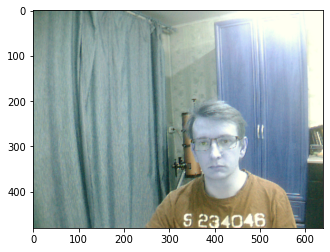

In [8]:
plt.imshow(frame)  # тут нужно настроить цвета ...

## Детекция лиц

In [13]:
# объект для детекции лиц
detector = dlib.get_frontal_face_detector()

In [17]:
face_rects = detector(frame)  # вернёт список из прямоугольников, где обнаружены лица
face_rects

rectangles[[(342, 259) (466, 383)]]

In [32]:
# подрисуем прямоугольник
frame2 = cv2.rectangle(frame, (342, 259), (466, 383), 444, 2)

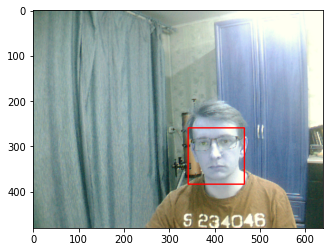

In [33]:
plt.imshow(frame)

## Нахождение оорных точек

In [36]:
!wget https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2

--2021-02-28 21:45:19--  https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_     [  <=>               ] 100,40K   246KB/s    in 0,4s    

2021-02-28 21:45:20 (246 KB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [102814]



In [41]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [42]:
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # ищет опорные точки на лице
# hape_predictor_68_face_landmarks.dat -- параметры нейросети
# https://github.com/davisking/dlib-models -- другие нейросети

вроде таких
![](https://1.bp.blogspot.com/-FtyIjfFokzQ/U__h1sAoEEI/AAAAAAAAAR0/URuVhX9cR-E/s1600/landmarked_face2.png)

In [44]:
face_shape = sp(frame, face_rects[0])

In [45]:
face_shape

## Лицо -> вектор

In [47]:
!wget https://github.com/davisking/dlib-models/blob/master/dlib_face_recognition_resnet_model_v1.dat.bz2

--2021-02-28 22:23:58--  https://github.com/davisking/dlib-models/blob/master/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti     [  <=>               ] 100,50K   255KB/s    in 0,4s    

2021-02-28 22:23:59 (255 KB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [102911]



In [48]:
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2

bzip2: Output file dlib_face_recognition_resnet_model_v1.dat already exists.


In [46]:
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [49]:
face_descriptor = facerec.compute_face_descriptor(frame, face_shape)

In [50]:
face_descriptor

dlib.vector([-0.0766023, 0.134432, 0.067598, -0.0125492, -0.0775162, -0.00746943, -0.0458151, -0.0550611, 0.0724127, -0.0809318, 0.224618, -0.114564, -0.269637, -0.0146721, 0.0736802, 0.146519, -0.110306, -0.119175, -0.141721, -0.111971, -0.00361347, 0.0429366, -0.10968, 0.0442832, -0.131136, -0.267453, -0.0601845, -0.0919946, 0.0879977, -0.117886, 0.0186271, 0.0532953, -0.0250976, 0.0130929, 0.0480423, 0.0234659, -0.12751, -0.112083, 0.273506, -0.0564543, -0.212372, 0.0133382, 0.0619482, 0.268552, 0.23897, 0.0468598, 0.0502749, -0.0703628, 0.156311, -0.252119, 0.0393572, 0.168605, 0.104907, 0.116183, 0.0806603, -0.230954, -0.010719, 0.122997, -0.202853, 0.0769682, 0.0413871, -0.230634, -0.0172637, -0.0598827, 0.159765, 0.066975, -0.0993962, -0.131605, 0.222595, -0.185523, -0.0794808, 0.117755, -0.113905, -0.188812, -0.302531, 0.0553898, 0.373015, 0.174125, -0.164322, 0.0318061, 0.090946, -0.0403167, 0.106544, 0.143581, -0.0937773, -0.180928, -0.0764465, 0.0103496, 0.240322, -0.0498117